<a href="https://colab.research.google.com/github/Prakashsingh04/house-price-prediction-gradient-boosting/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***#HOUSE PRICE PREDICTION using Gradient Boost***

Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


dataset is from kaggle

In [ ]:
file_path = "Bengaluru_House_Data.csv"
df = pd.read_csv(file_path)


Pre-processing part

In [ ]:

df.drop(columns=['availability', 'society'], inplace=True)

# Convert 'size' to numeric BHK count
df['BHK'] = df['size'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) else np.nan)
df.drop(columns=['size'], inplace=True)

# Convert 'total_sqft' to numeric (handle ranges like "1200-1500")
def convert_sqft(sqft):
    if isinstance(sqft, str):
        if '-' in sqft:
            values = list(map(float, sqft.split('-')))
            return np.mean(values)
        try:
            return float(sqft)
        except:
            return np.nan
    return sqft

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)
df.dropna(inplace=True)


encoding and splitting (80:20)

In [ ]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['area_type', 'location'], drop_first=True)
print(df_encoded.head())
# Define input features (X) and target variable (y)
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   total_sqft  bath  balcony   price  BHK  area_type_Carpet  Area  \
0      1056.0   2.0      1.0   39.07  2.0                   False   
1      2600.0   5.0      3.0  120.00  4.0                   False   
2      1440.0   2.0      3.0   62.00  3.0                   False   
3      1521.0   3.0      1.0   95.00  3.0                   False   
4      1200.0   2.0      1.0   51.00  2.0                   False   

   area_type_Plot  Area  area_type_Super built-up  Area  location_ Banaswadi  \
0                 False                            True                False   
1                  True                           False                False   
2                 False                           False                False   
3                 False                            True                False   
4                 False                            True                False   

   location_ Basavangudi  ...  location_ravindra nagar, T.dasarahalli peenya  \
0                  False

Training, prediction and evaluation
***Using Gradient Boosting to iteratively improve weak models.***



In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_model.fit(X_train, y_train)
# from xgboost import XGBRegressor

# model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
# model.fit(X_train, y_train)

# Predictions
y_pred = gb_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 33.36
RMSE: 84.48
R² Score: 0.67


**Best hyperparameter**


Using GridSearchCV to optimize model parameters.

Tuning learning rate, number of estimators, max depth, and for trees.  

In [ ]:
# Define optimized parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=2, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with best hyperparameters
best_model = GradientBoostingRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate tuned model
y_pred_best = best_model.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"Tuned MAE: {mae_best:.2f}")
print(f"Tuned RMSE: {rmse_best:.2f}")
print(f"Tuned R² Score: {r2_best:.2f}")


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Tuned MAE: 31.25
Tuned RMSE: 79.87
Tuned R² Score: 0.70


plotting

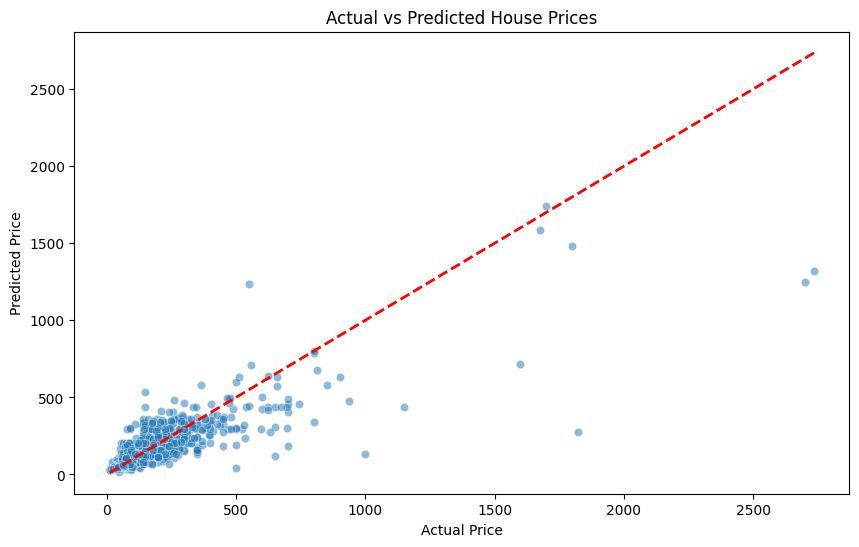

In [ ]:
# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()



comparing before and after

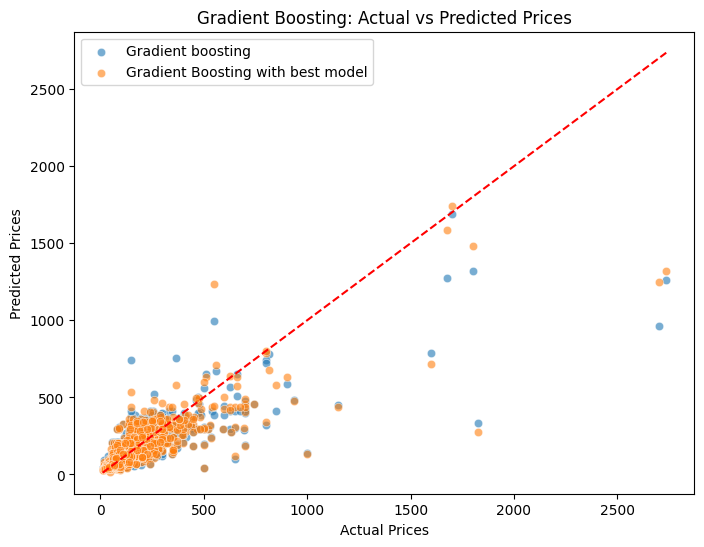

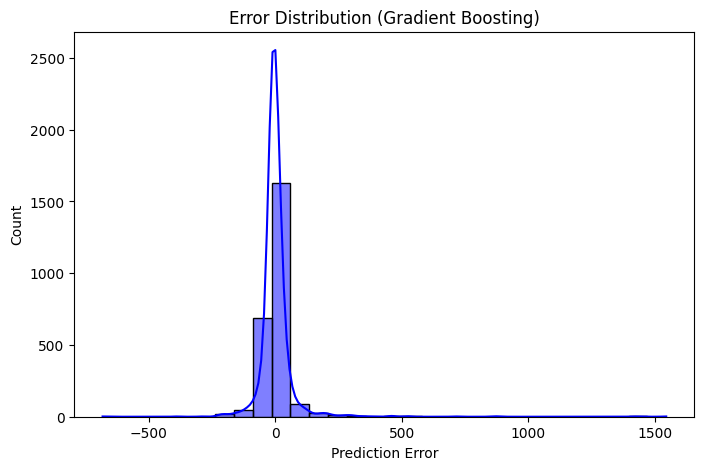

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Prediction vs Actual Prices (Gradient Boosting)
plt.figure(figsize=(8, 6))
#sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.5)
sns.scatterplot(x=y_test, y=y_pred, label="Gradient boosting", alpha=0.6)
sns.scatterplot(x=y_test, y=y_pred_best, label="Gradient Boosting with best model", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')
plt.title("Gradient Boosting: Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()


# Error Distribution (Gradient Boosting)
plt.figure(figsize=(8, 5))
sns.histplot(y_test - y_pred_best, bins=30, kde=True, color="blue")
plt.title("Error Distribution (Gradient Boosting)")
plt.xlabel("Prediction Error")
plt.show()



# ***Testing and predicting on a sample data***  

In [ ]:
import pandas as pd
import numpy as np

sample_data = pd.DataFrame(np.zeros((1, len(X_train.columns))), columns=X_train.columns)

# Set values for numerical features
sample_data['total_sqft'] = 1500
sample_data['bath'] = 3
sample_data['balcony'] = 2
sample_data['BHK'] = 3

# Set the correct one-hot encoded categorical values
sample_data['area_type_Super built-up  Area'] = 1
sample_data['location_whitefiled'] = 1

# Ensure preprocessing is not needed (X_train is already preprocessed)
sample_data_processed = sample_data

# Predict house price using trained Gradient Boosting model
predicted_price = best_model.predict(sample_data_processed)

print(f"Predicted House Price: ₹{predicted_price[0]:,.2f}(lakhs)")


Predicted House Price: ₹82.49(lakhs)


*using XGBOOST*

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.2f}")


XGBoost MAE: 33.57
XGBoost RMSE: 84.92
XGBoost R² Score: 0.66


In [ ]:
param_grid = {
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.05],
    'max_depth': [4, 5, 6, 7],
    'subsample': [0.8, 1.0],               # for row sampling
    'colsample_bytree': [0.8, 1.0],        # for column sampling
    'gamma': [0, 1, 5],                    # minimum loss reduction
    'reg_alpha': [0, 0.1, 1],              # L1 regularization
    'reg_lambda': [1, 1.5, 2]              # L2 regularization
}
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

random_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=60,  # Try 60 random combos instead of all 3888
    scoring='r2',
    n_jobs=-1,
    cv=3,
    verbose=1
)
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 60 candidates, totalling 180 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.05],
                                        'max_depth': [4, 5, 6, 7],
                                        'n_estimators': [200, 300],
                                        'reg_alpha': [0, 0.1, 1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.8, 1.0]},
                   scoring='r2', verbose=1)

In [ ]:
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.8}


In [ ]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Tuned XGB MAE: {mae:.2f}")
print(f"Tuned XGB RMSE: {rmse:.2f}")
print(f"Tuned XGB R² Score: {r2:.2f}")


Tuned XGB MAE: 31.41
Tuned XGB RMSE: 80.12
Tuned XGB R² Score: 0.70


In [ ]:
predicted_price_xgb = best_model.predict(sample_data_processed)
print(f"XGBoost Predicted Price: ₹{predicted_price_xgb[0]:,.2f}(lakhs)")


XGBoost Predicted Price: ₹85.19(lakhs)


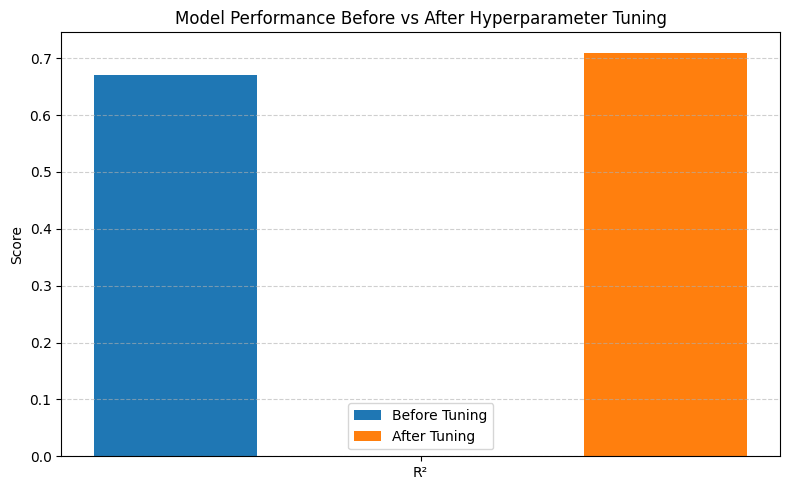

In [ ]:
import matplotlib.pyplot as plt

# Error metrics
metrics = [ 'R²']
before = [ 0.67]    # from initial Gradient Boosting
after = [ 0.71]     # from tuned XGBoost

x = range(len(metrics))
plt.figure(figsize=(8, 5))
plt.bar(x, before, width=0.1, label='Before Tuning', align='center')
plt.bar([i + 0.3 for i in x], after, width=0.1, label='After Tuning', align='center')
plt.xticks([i + 0.15 for i in x], metrics)
plt.ylabel("Score")
plt.title("Model Performance Before vs After Hyperparameter Tuning")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
